    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

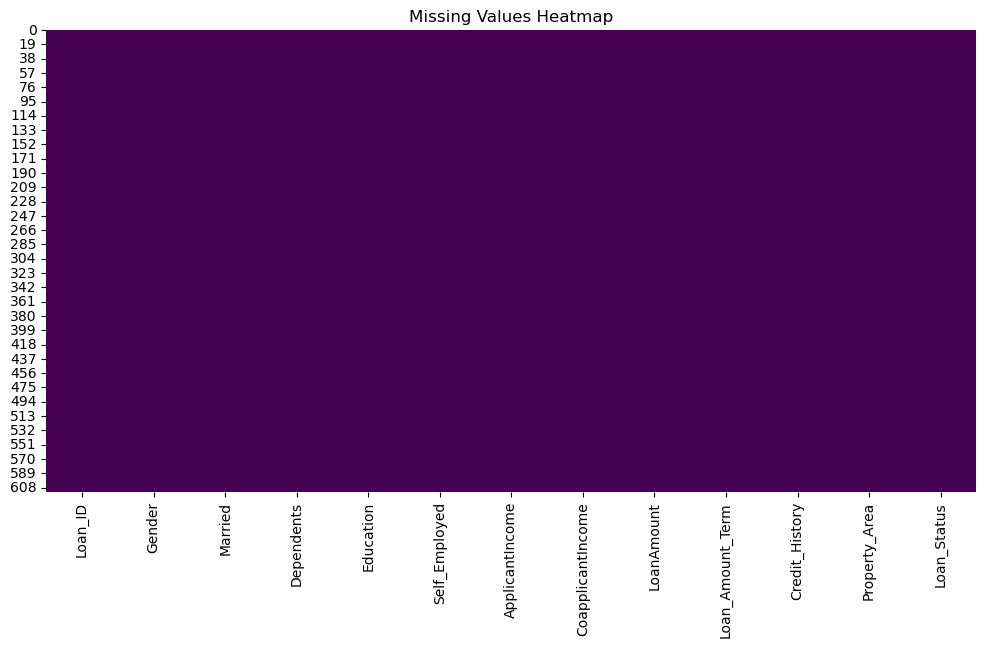

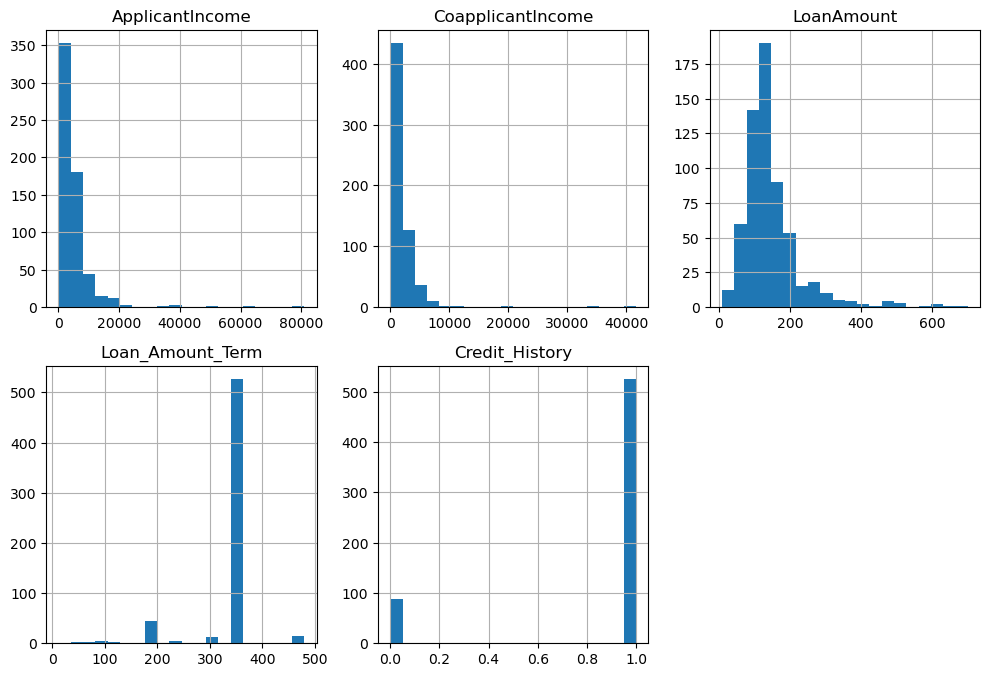

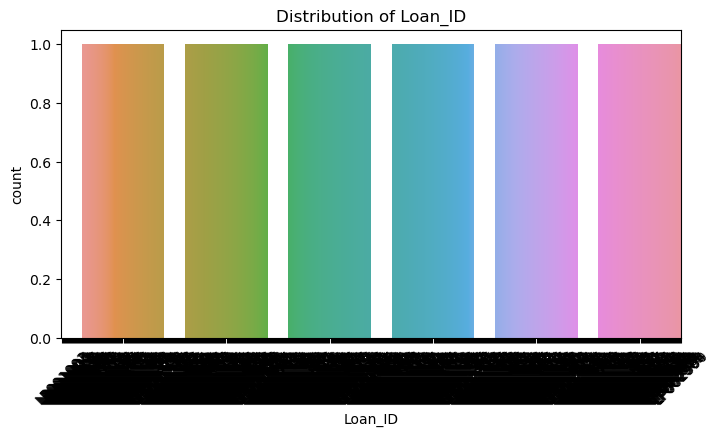

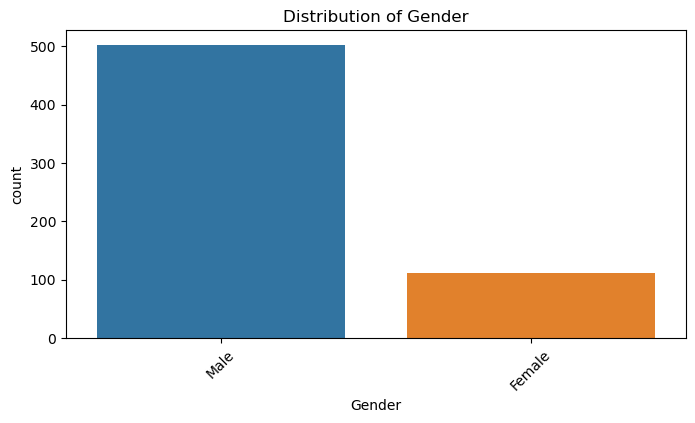

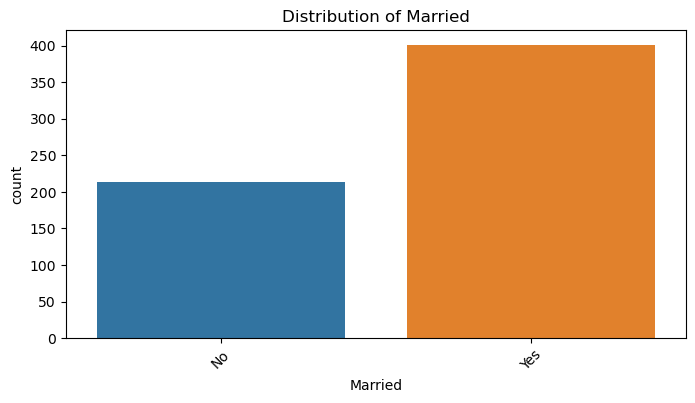

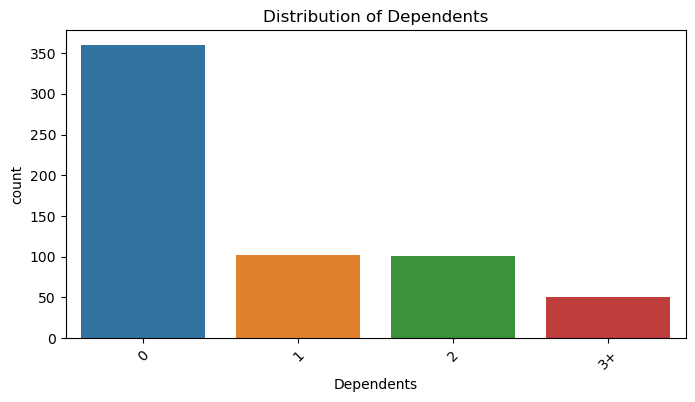

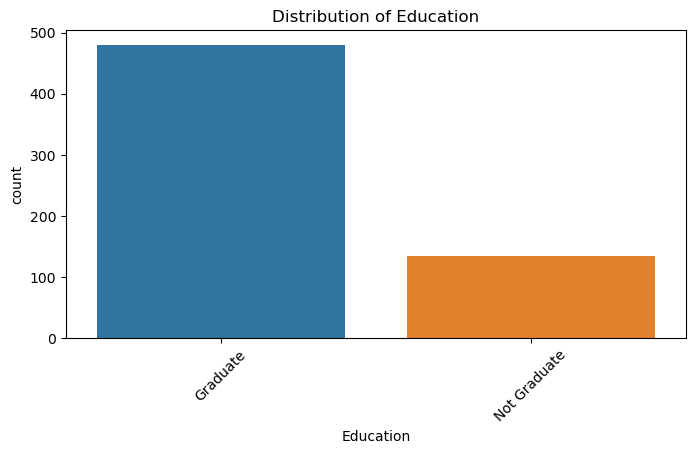

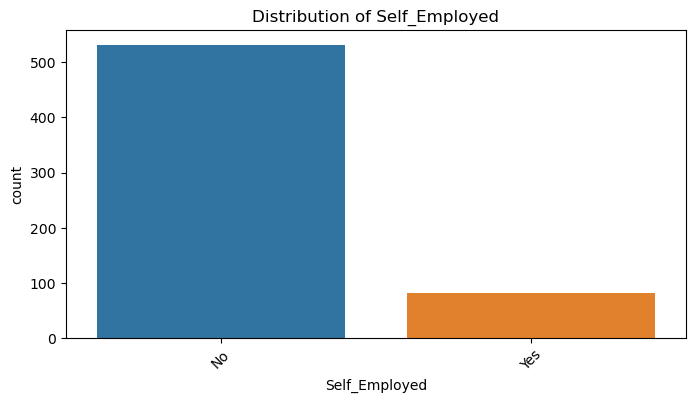

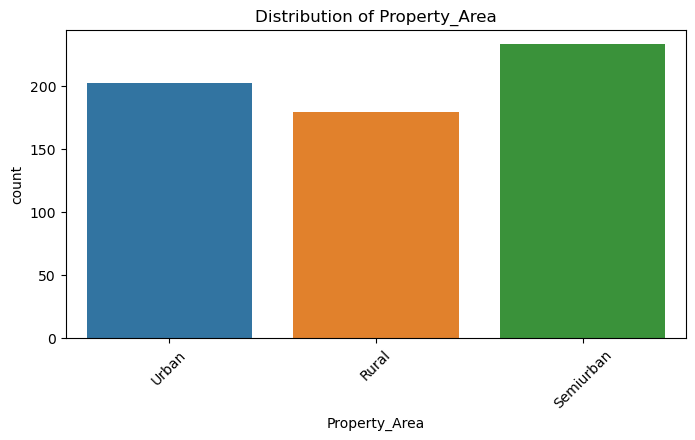

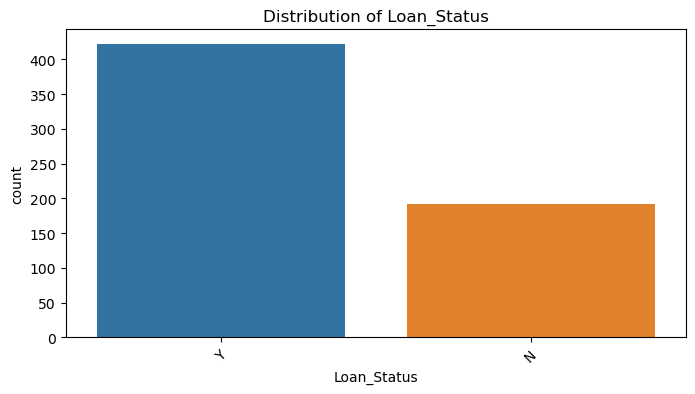

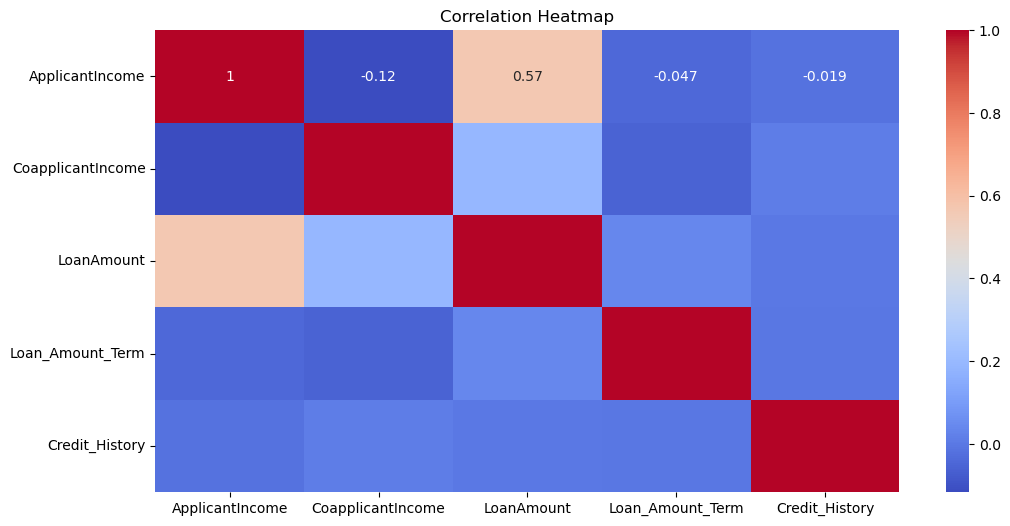

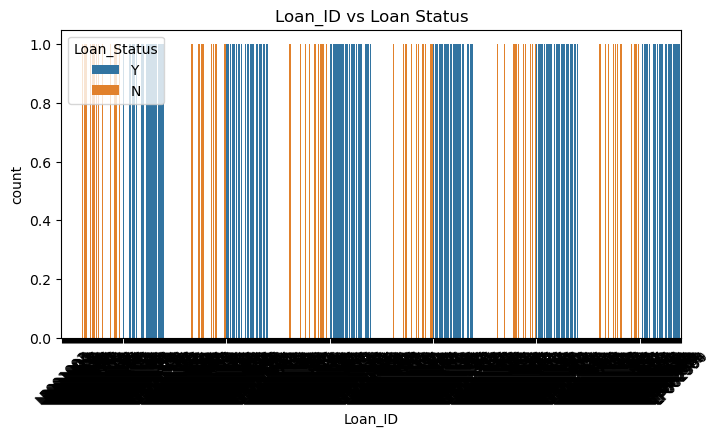

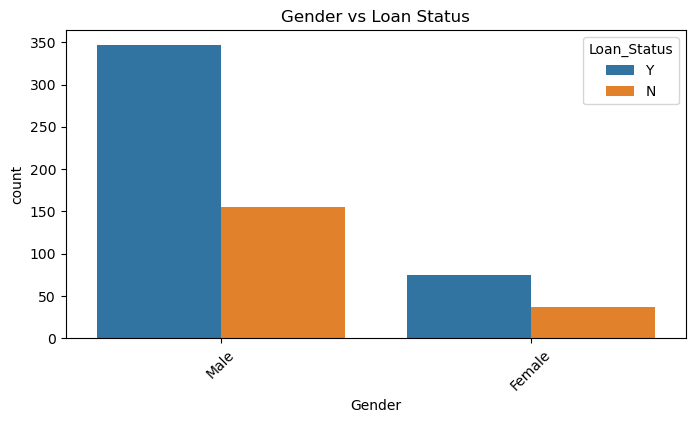

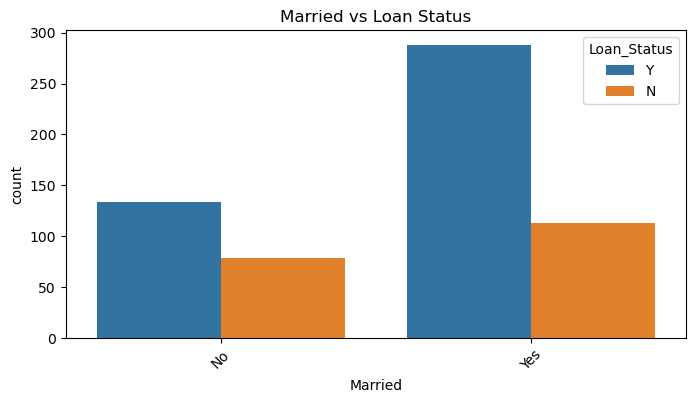

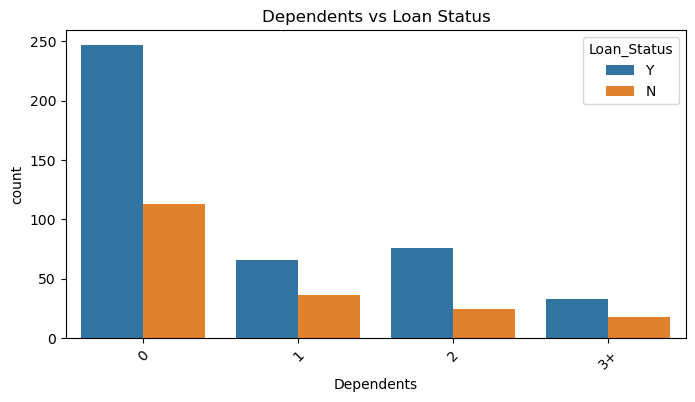

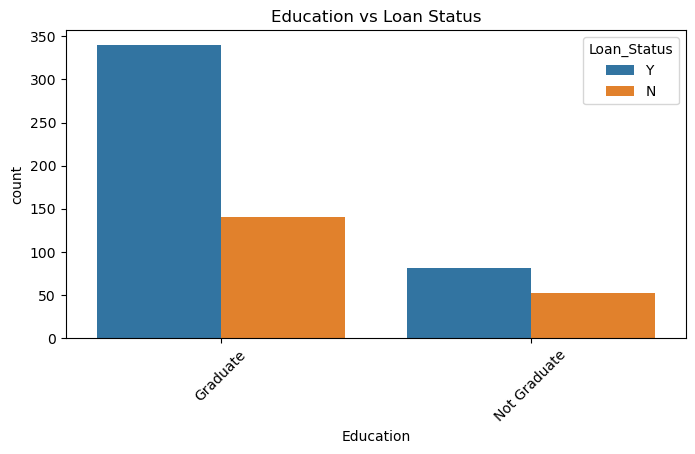

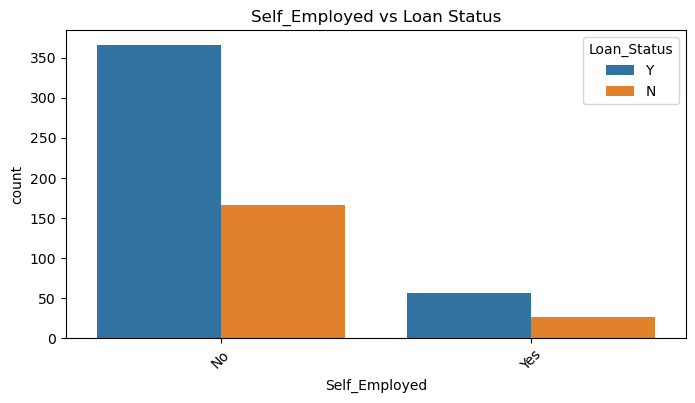

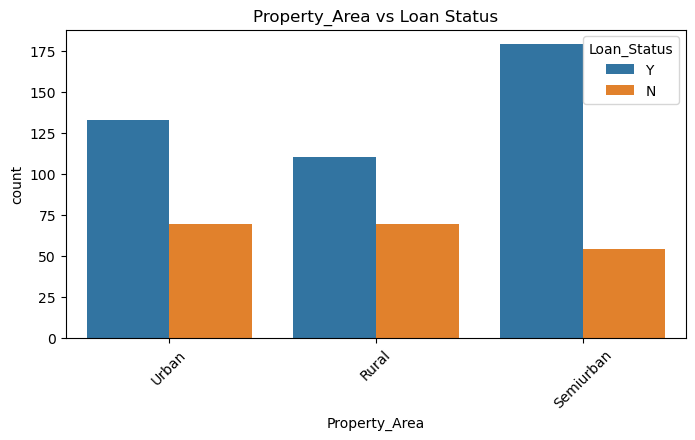

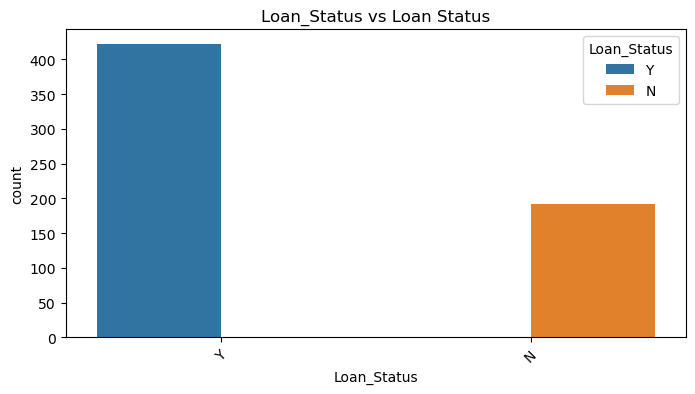

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

# Import custom preprocessing functions
from data_preprocessing import load_data, handle_missing_values

# Load the data
train_data, test_data = load_data('../data/train.csv', '../data/test.csv')

# Handle missing values
train_data = handle_missing_values(train_data)
test_data = handle_missing_values(test_data)

# Display the first few rows of the train dataset
print(train_data.head())

# Basic statistics of the dataset
print(train_data.describe())

# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Univariate Analysis: Distribution of numerical features
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[num_cols].hist(figsize=(10, 10), bins=20, layout=(3, 3))
plt.tight_layout()
plt.show()

# Univariate Analysis: Distribution of categorical features
cat_cols = train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis: Correlation Heatmap
# Select numeric columns for correlation analysis
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bivariate Analysis: Categorical vs Target variable
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Loan_Status', data=train_data)
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()

# Save the cleaned and preprocessed data (optional)
train_data.to_csv('../data/train_cleaned.csv', index=False)
test_data.to_csv('../data/test_cleaned.csv', index=False)
